In [13]:
import pandas as pd

data = pd.read_csv(r'C:\Users\raili\Downloads\churn.csv')

print(data.head())



   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
print(data.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [37]:
import matplotlib.pyplot as plt

print(data.columns)


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


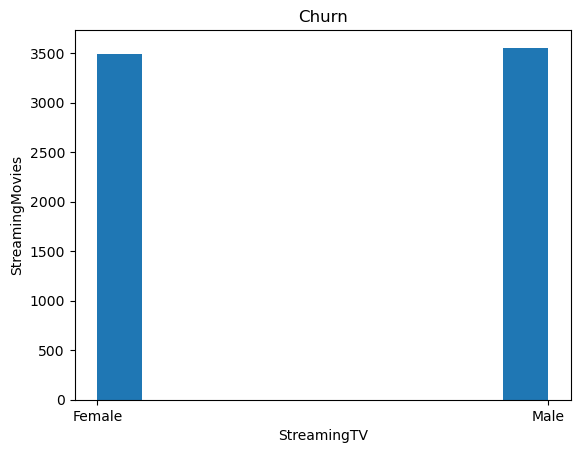

In [78]:
plt.hist(data['gender'])
plt.title('Churn')
plt.xlabel('StreamingTV')
plt.ylabel('StreamingMovies')
plt.show()

In [65]:
from sklearn.preprocessing import LabelEncoder

# Skapa en instans av LabelEncoder
label_encoder = LabelEncoder()

# Loopa igenom varje kolumn i X_train och konvertera kategoriska variabler till numeriska
for col in X_train.columns:
    if X_train[col].dtype == 'object':  # Kontrollera om kolumnen innehåller strängar
        X_train[col] = label_encoder.fit_transform(X_train[col])

# Upprepa processen för X_test
for col in X_test.columns:
    if X_test[col].dtype == 'object':
        X_test[col] = label_encoder.fit_transform(X_test[col])


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = data.drop('Churn', axis=1)
y = data['Churn']

In [68]:
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        print(f"Unika värden i {col}: {X_train[col].unique()}")


Unika värden i customerID: ['4223-BKEOR' '6035-RIIOM' '3797-VTIDR' ... '8044-BGWPI' '7450-NWRTR'
 '4795-UXVCJ']
Unika värden i gender: ['Female' 'Male']
Unika värden i Partner: ['No' 'Yes']
Unika värden i Dependents: ['Yes' 'No']
Unika värden i PhoneService: ['Yes' 'No']
Unika värden i MultipleLines: ['No' 'Yes' 'No phone service']
Unika värden i InternetService: ['DSL' 'Fiber optic' 'No']
Unika värden i OnlineSecurity: ['Yes' 'No' 'No internet service']
Unika värden i OnlineBackup: ['No' 'Yes' 'No internet service']
Unika värden i DeviceProtection: ['Yes' 'No' 'No internet service']
Unika värden i TechSupport: ['No' 'Yes' 'No internet service']
Unika värden i StreamingTV: ['No' 'Yes' 'No internet service']
Unika värden i StreamingMovies: ['Yes' 'No' 'No internet service']
Unika värden i Contract: ['One year' 'Two year' 'Month-to-month']
Unika värden i PaperlessBilling: ['No' 'Yes']
Unika värden i PaymentMethod: ['Mailed check' 'Bank transfer (automatic)' 'Electronic check'
 'Credit ca

In [75]:
cols_to_drop = ['customerID', 'TotalCharges']
X_train = X_train.drop(cols_to_drop, axis=1)
X_test = X_test.drop(cols_to_drop, axis=1)

# Utför One-Hot Encoding på kategoriska variabler
X_train_encoded = pd.get_dummies(X_train, columns=X_train.select_dtypes(include=['object']).columns)
X_test_encoded = pd.get_dummies(X_test, columns=X_test.select_dtypes(include=['object']).columns)



In [76]:
str_cols_train = X_train.select_dtypes(include=['object']).columns
str_cols_test = X_test.select_dtypes(include=['object']).columns

print("träningsdatan:", str_cols_train)
print("testdatan:", str_cols_test)


träningsdatan: Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')
testdatan: Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Skapar en instans av Random Forest-modellen
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)


random_forest.fit(X_train_encoded, y_train)


predictions = random_forest.predict(X_test_encoded)

# Beräknar noggrannheten
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Visar en klassificeringsrapport
print(classification_report(y_test, predictions))


Accuracy: 0.7899219304471257
              precision    recall  f1-score   support

          No       0.83      0.90      0.86      1036
         Yes       0.64      0.47      0.54       373

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409

